In [53]:
import numpy as np
from cvxopt import matrix
from cvxopt import solvers
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics

In [54]:
X = pd.read_csv('labels.csv')

In [55]:
X.head(5)

,Unnamed: 0,agressivite,visibilite,hstag,hstagmoyenTweet,longMoyen,frequenceFollowers,frequenceMention,frequenceAmi,refermoyenTweet,retweet,reply,Nombreurl,frenquenTweet,frequenceFavourite
0,0,0.165714,0.408571,6.0,1.0,113.333333,-0.000450,-2.323033e-05,-1.536059e-08,0.666667,0,0,5.0,-2.816108e-07,-0.000069
1,1,0.000000,0.081429,0.0,0.0,139.000000,-0.000002,-7.835056e-08,-0.000000e+00,1.000000,0,0,0.0,-0.000000e+00,-0.000012
2,2,0.000000,0.000000,0.0,0.0,31.000000,-0.000029,-1.188993e-06,-0.000000e+00,0.000000,0,0,1.0,-0.000000e+00,-0.000293
3,3,0.000000,0.082857,1.0,1.0,88.000000,-0.000141,-1.239240e-05,-0.000000e+00,0.000000,0,0,0.0,-0.000000e+00,-0.000040
4,4,0.000000,0.330000,3.0,3.0,140.000000,-0.000082,-4.996178e-06,-0.000000e+00,1.000000,0,0,1.0,-0.000000e+00,-0.000225


In [56]:
X = X.iloc[:, 1:]
X

,agressivite,visibilite,hstag,hstagmoyenTweet,longMoyen,frequenceFollowers,frequenceMention,frequenceAmi,refermoyenTweet,retweet,reply,Nombreurl,frenquenTweet,frequenceFavourite
0,0.165714,0.408571,6.0,1.0,113.333333,-0.000450,-2.323033e-05,-1.536059e-08,0.666667,0,0,5.0,-2.816108e-07,-0.000069
1,0.000000,0.081429,0.0,0.0,139.000000,-0.000002,-7.835056e-08,-0.000000e+00,1.000000,0,0,0.0,-0.000000e+00,-0.000012
2,0.000000,0.000000,0.0,0.0,31.000000,-0.000029,-1.188993e-06,-0.000000e+00,0.000000,0,0,1.0,-0.000000e+00,-0.000293
3,0.000000,0.082857,1.0,1.0,88.000000,-0.000141,-1.239240e-05,-0.000000e+00,0.000000,0,0,0.0,-0.000000e+00,-0.000040
4,0.000000,0.330000,3.0,3.0,140.000000,-0.000082,-4.996178e-06,-0.000000e+00,1.000000,0,0,1.0,-0.000000e+00,-0.000225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843434,0.000000,0.330000,3.0,3.0,75.000000,-0.000000,-0.000000e+00,-0.000000e+00,1.000000,0,0,0.0,-0.000000e+00,-0.000000
1843435,0.000000,0.330000,3.0,3.0,75.000000,-0.000000,-0.000000e+00,-0.000000e+00,1.000000,0,0,0.0,-0.000000e+00,-0.000000
1843436,0.000000,0.412857,4.0,4.0,142.000000,-0.000000,-0.000000e+00,-0.000000e+00,1.000000,0,0,0.0,-0.000000e+00,-0.000000
1843437,0.000000,0.330000,3.0,3.0,75.000000,-0.000000,-0.000000e+00,-0.000000e+00,1.000000,0,0,0.0,-0.000000e+00,-0.000000


In [57]:
X.head(5)

,agressivite,visibilite,hstag,hstagmoyenTweet,longMoyen,frequenceFollowers,frequenceMention,frequenceAmi,refermoyenTweet,retweet,reply,Nombreurl,frenquenTweet,frequenceFavourite
0,0.165714,0.408571,6.0,1.0,113.333333,-0.000450,-2.323033e-05,-1.536059e-08,0.666667,0,0,5.0,-2.816108e-07,-0.000069
1,0.000000,0.081429,0.0,0.0,139.000000,-0.000002,-7.835056e-08,-0.000000e+00,1.000000,0,0,0.0,-0.000000e+00,-0.000012
2,0.000000,0.000000,0.0,0.0,31.000000,-0.000029,-1.188993e-06,-0.000000e+00,0.000000,0,0,1.0,-0.000000e+00,-0.000293
3,0.000000,0.082857,1.0,1.0,88.000000,-0.000141,-1.239240e-05,-0.000000e+00,0.000000,0,0,0.0,-0.000000e+00,-0.000040
4,0.000000,0.330000,3.0,3.0,140.000000,-0.000082,-4.996178e-06,-0.000000e+00,1.000000,0,0,1.0,-0.000000e+00,-0.000225


In [58]:
X.describe()

,agressivite,visibilite,hstag,hstagmoyenTweet,longMoyen,frequenceFollowers,frequenceMention,frequenceAmi,refermoyenTweet,retweet,reply,Nombreurl,frenquenTweet,frequenceFavourite
count,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1843439.0,1843439.0,1.843439e+06,1.843439e+06,1.843439e+06
mean,6.892047e-02,3.044424e-01,4.257291e+00,1.554324e+00,1.089201e+02,9.948410e-03,8.405139e-05,-1.801562e-08,9.177986e-01,0.0,0.0,1.384654e+00,-9.927499e-08,4.544879e-02
std,1.046694e+00,8.219777e-01,2.520273e+01,1.475271e+00,3.179056e+01,7.306857e+00,5.477577e-02,1.280868e-06,7.067871e-01,0.0,0.0,6.660470e+00,5.255897e-07,2.267844e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,-3.007674e+01,-1.091091e-01,-1.474396e-03,0.000000e+00,0.0,0.0,0.000000e+00,-1.022195e-04,-9.785085e+01
25%,0.000000e+00,8.285714e-02,1.000000e+00,6.666667e-01,8.900000e+01,-5.893297e-06,-6.259098e-08,-0.000000e+00,5.714286e-01,0.0,0.0,0.000000e+00,-2.614408e-08,-5.964759e-05
50%,0.000000e+00,2.457143e-01,2.000000e+00,1.000000e+00,1.140000e+02,-1.950523e-06,-1.169654e-08,0.000000e+00,1.000000e+00,0.0,0.0,1.000000e+00,0.000000e+00,-1.471868e-05
75%,1.428571e-02,3.314286e-01,4.000000e+00,2.000000e+00,1.400000e+02,-6.509829e-07,-0.000000e+00,-0.000000e+00,1.000000e+00,0.0,0.0,1.000000e+00,-0.000000e+00,-2.873365e-06
max,1.228597e+03,7.454592e+02,2.199300e+04,2.500000e+01,4.160000e+02,8.882000e+03,6.200000e+01,-0.000000e+00,1.300000e+01,0.0,0.0,3.310000e+03,-0.000000e+00,1.763400e+04


### Voyons voir si on si il y a des outliers

Text(0, 0.5, 'frequenceFavourite')

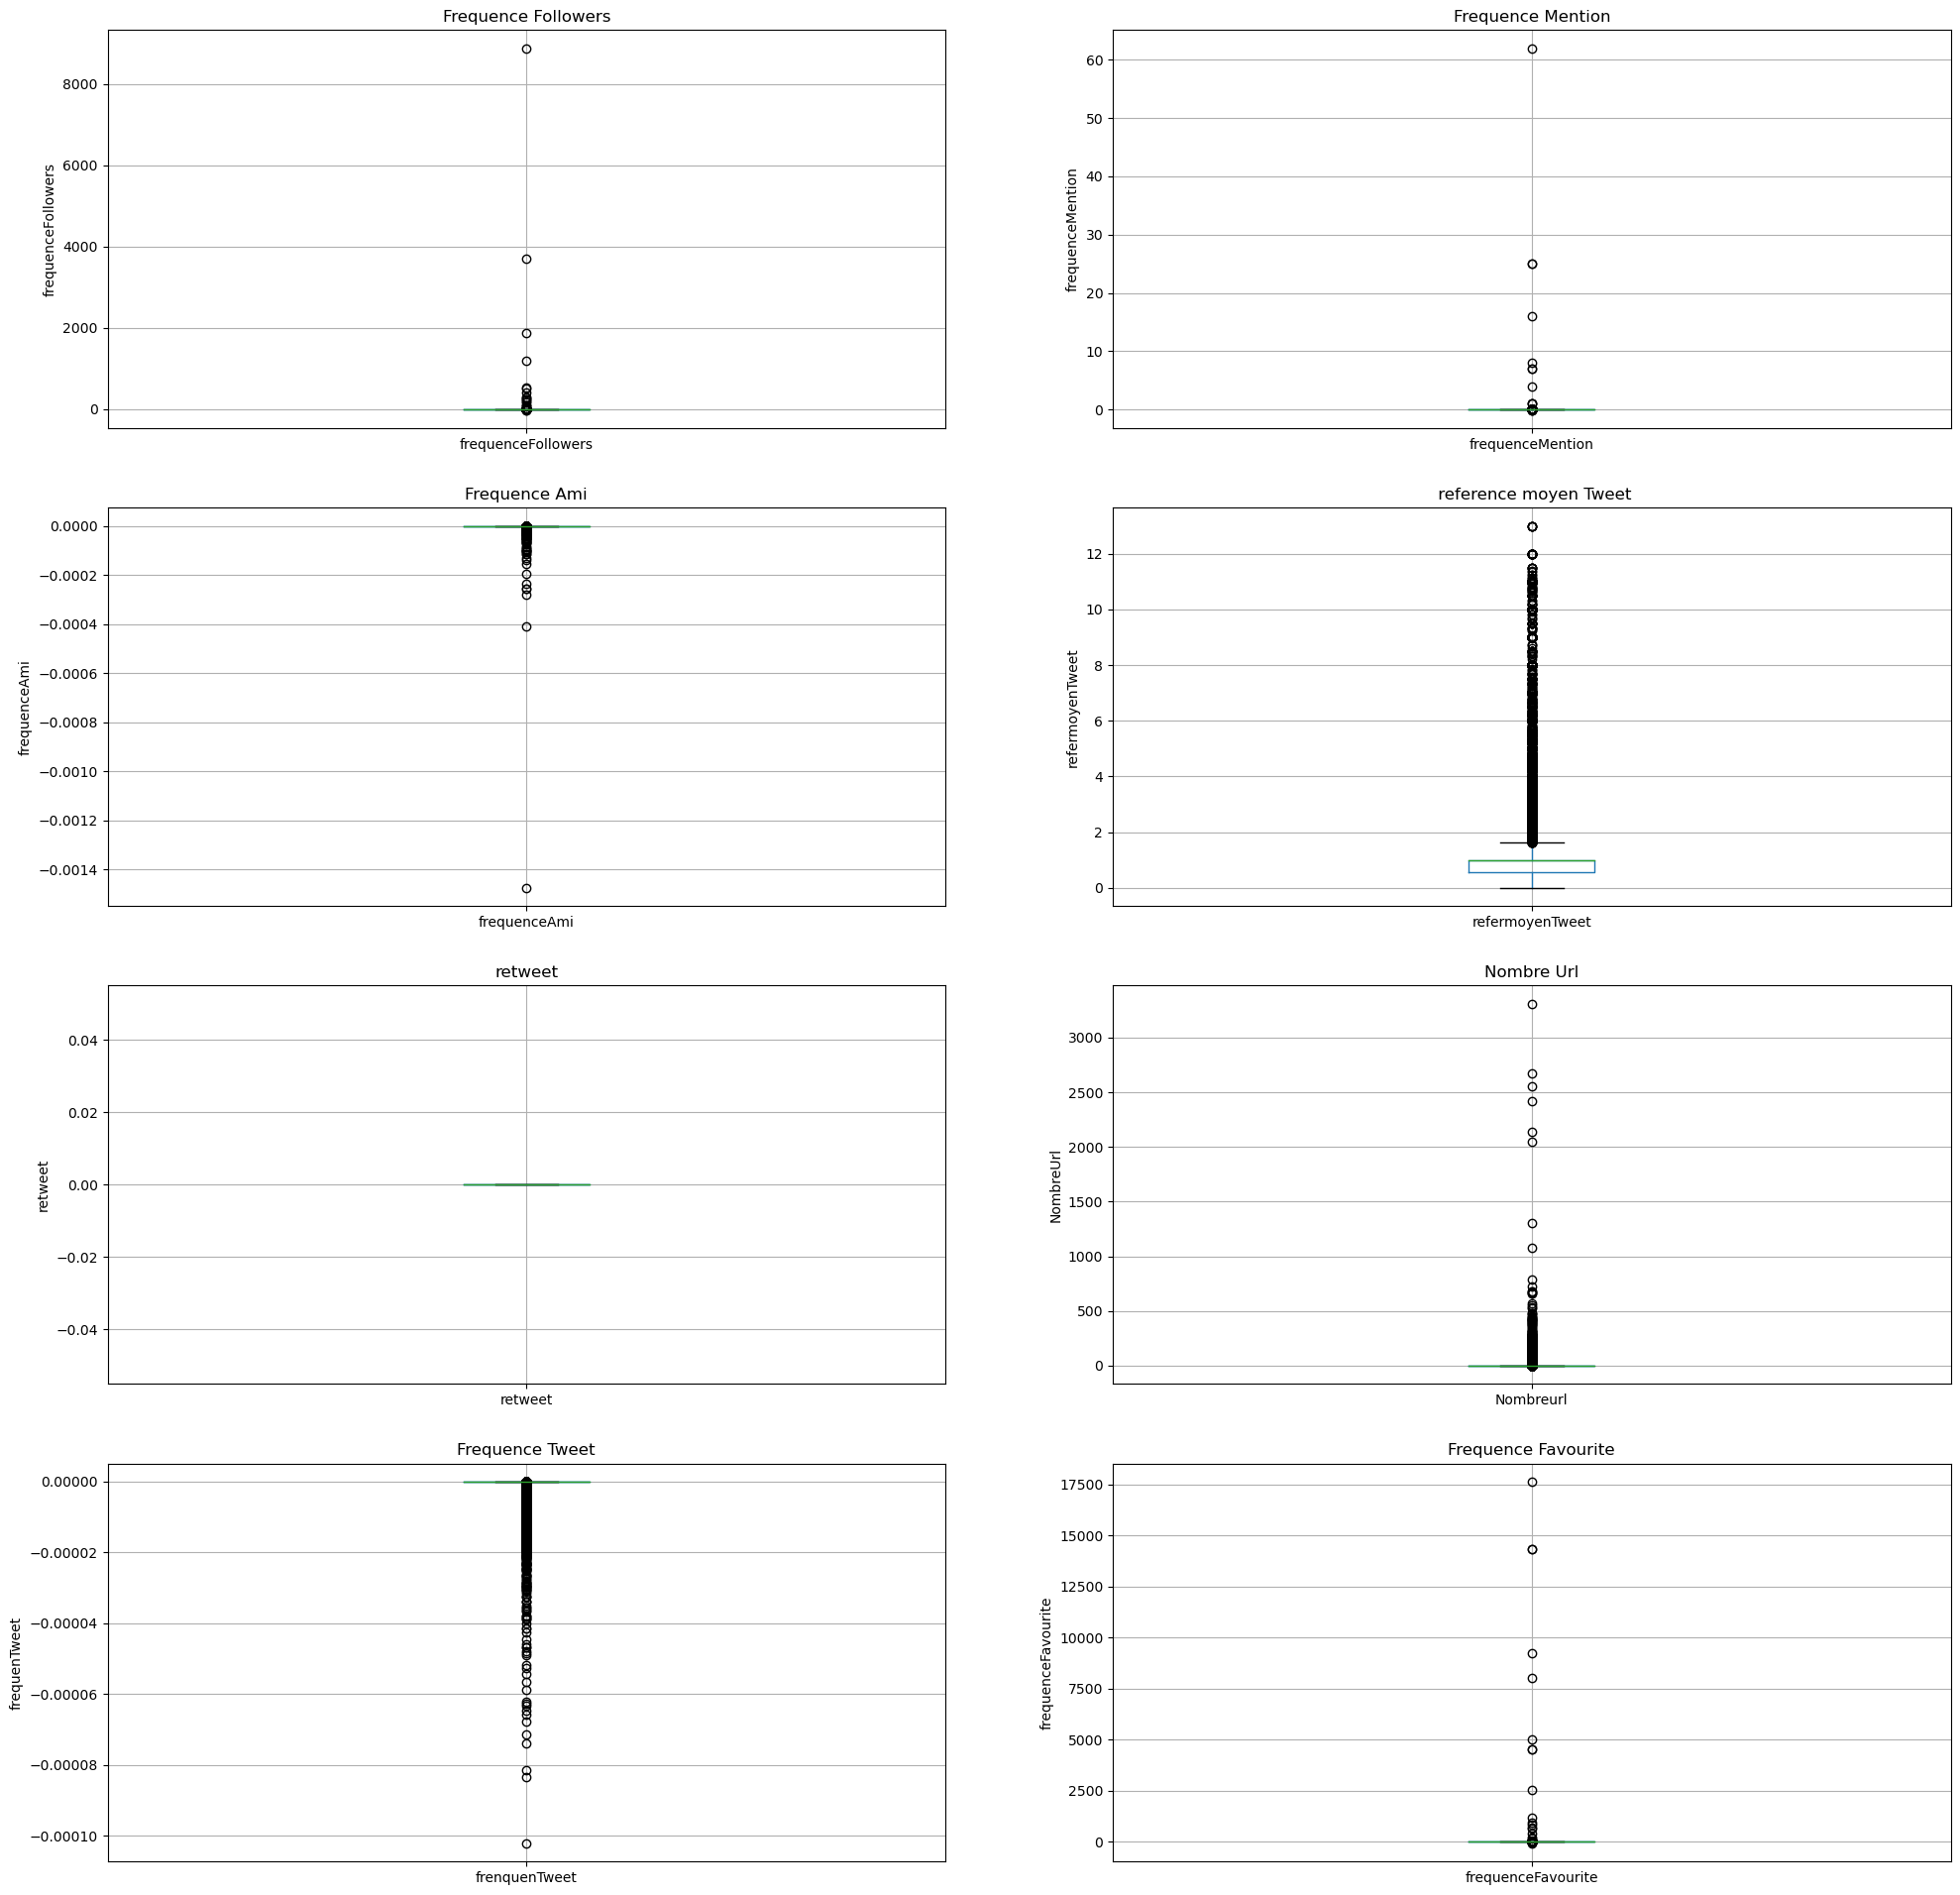

In [51]:
plt.figure(figsize=(24,24))
plt.subplot(4, 2, 1)
fig = X.boxplot(column='frequenceFollowers')
fig.set_title('Frequence Followers')
fig.set_ylabel('frequenceFollowers')



plt.subplot(4, 2, 2)
fig = X.boxplot(column='frequenceMention')
fig.set_title('Frequence Mention')
fig.set_ylabel('frequenceMention')



plt.subplot(4, 2, 3)
fig = X.boxplot(column='frequenceAmi')
fig.set_title('Frequence Ami')
fig.set_ylabel('frequenceAmi')



plt.subplot(4, 2, 4)
fig = X.boxplot(column='refermoyenTweet')
fig.set_title(' reference moyen Tweet')
fig.set_ylabel('refermoyenTweet')



plt.subplot(4, 2, 5)
fig = X.boxplot(column='retweet')
fig.set_title('retweet')
fig.set_ylabel('retweet')



plt.subplot(4, 2, 6)
fig = X.boxplot(column='Nombreurl')
fig.set_title('Nombre Url')
fig.set_ylabel('NombreUrl')



plt.subplot(4, 2, 7)
fig = X.boxplot(column='frenquenTweet')
fig.set_title('Frequence Tweet')
fig.set_ylabel('frequenTweet')


plt.subplot(4, 2, 8)
fig = X.boxplot(column='frequenceFavourite')
fig.set_title('Frequence Favourite')
fig.set_ylabel('frequenceFavourite')


Text(0, 0.5, 'longMoyen')

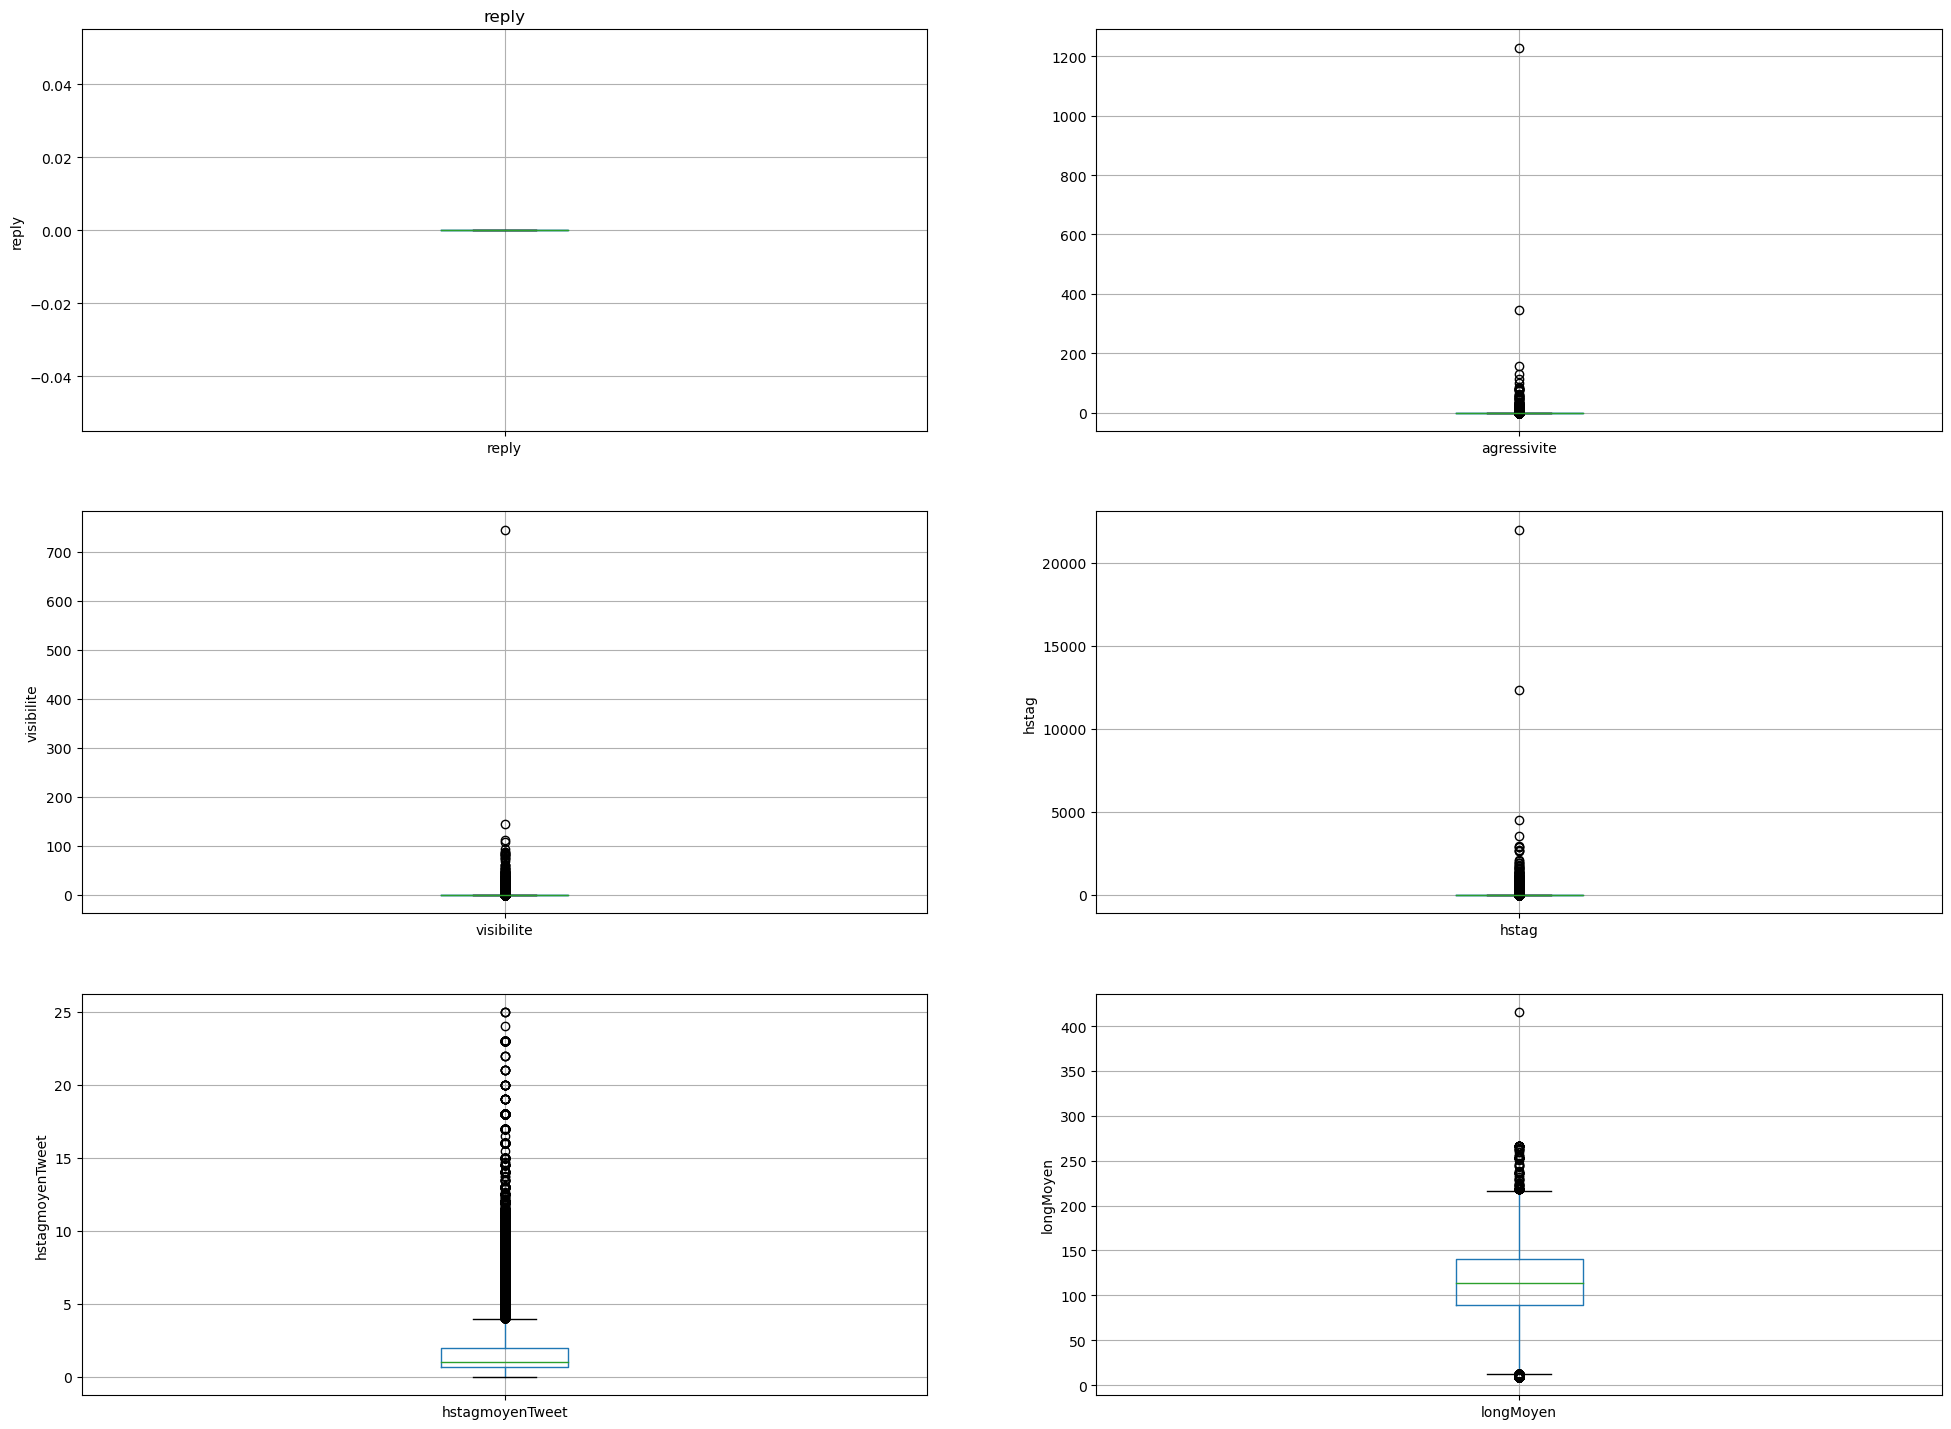

In [52]:
plt.figure(figsize=(24,24))
plt.subplot(4, 2, 1)
fig = X.boxplot(column='reply')
fig.set_title('reply')
fig.set_ylabel('reply')

plt.subplot(4, 2, 2)
fig = X.boxplot(column='agressivite')
fig.set_title('')
fig.set_ylabel('')

plt.subplot(4, 2, 3)
fig = X.boxplot(column='visibilite')
fig.set_title('')
fig.set_ylabel('visibilite')

plt.subplot(4, 2, 4)
fig = X.boxplot(column='hstag')
fig.set_title('')
fig.set_ylabel('hstag')

plt.subplot(4, 2, 5)
fig = X.boxplot(column='hstagmoyenTweet')
fig.set_title('')
fig.set_ylabel('hstagmoyenTweet')

plt.subplot(4, 2, 6)
fig = X.boxplot(column='longMoyen')
fig.set_title('')
fig.set_ylabel('longMoyen')

In [53]:
X[X['visibilite']>200]

,agressivite,visibilite,hstag,hstagmoyenTweet,longMoyen,frequenceFollowers,frequenceMention,frequenceAmi,refermoyenTweet,retweet,reply,Nombreurl,frenquenTweet,frequenceFavourite
1680206,20.088571,745.459203,12370.0,1.731765,106.49293,-0.000002,-3.320814e-09,-0.0,1.281394,0,0,3310.0,-0.000023,-0.0


In [54]:
X[X['hstag']>5000]

,agressivite,visibilite,hstag,hstagmoyenTweet,longMoyen,frequenceFollowers,frequenceMention,frequenceAmi,refermoyenTweet,retweet,reply,Nombreurl,frenquenTweet,frequenceFavourite
191164,1228.597143,27.797194,21993.0,8.224757,135.409499,-0.003133,-2.602870e-06,-0.001474,0.124533,0,0,2672.0,-0.000012,-0.00041
1680206,20.088571,745.459203,12370.0,1.731765,106.492930,-0.000002,-3.320814e-09,-0.000000,1.281394,0,0,3310.0,-0.000023,-0.00000


In [55]:
## Nous allons supprimer la colonne retweet car elle est nulle presque partout

In [59]:
X.drop(X.columns[[9,10]], inplace = True, axis =1)

In [60]:
X.head(4)

,agressivite,visibilite,hstag,hstagmoyenTweet,longMoyen,frequenceFollowers,frequenceMention,frequenceAmi,refermoyenTweet,Nombreurl,frenquenTweet,frequenceFavourite
0,0.165714,0.408571,6.0,1.0,113.333333,-0.000450,-2.323033e-05,-1.536059e-08,0.666667,5.0,-2.816108e-07,-0.000069
1,0.000000,0.081429,0.0,0.0,139.000000,-0.000002,-7.835056e-08,-0.000000e+00,1.000000,0.0,-0.000000e+00,-0.000012
2,0.000000,0.000000,0.0,0.0,31.000000,-0.000029,-1.188993e-06,-0.000000e+00,0.000000,1.0,-0.000000e+00,-0.000293
3,0.000000,0.082857,1.0,1.0,88.000000,-0.000141,-1.239240e-05,-0.000000e+00,0.000000,0.0,-0.000000e+00,-0.000040


### SVM sur les donnees labelisees

In [61]:
X = X.iloc[:1999,:]

In [48]:
X = X.values

In [5]:
dy1= pd.read_csv('labels 0 - 1000.csv')

In [6]:
dy1.head(5)

,Unnamed: 0,agressivite,visibilite,hstag,hstagmoyenTweet,longMoyen,frequenceFollowers,frequenceMention,frequenceAmi,refermoyenTweet,retweet,reply,Nombreurl,frenquenTweet,frequenceFavourite,Unnamed: 15,label
0,0.0,0.165714,0.408571,6.0,1.0,113.333333,-0.000450,-2.320000e-05,-1.540000e-08,0.666667,0.0,0.0,5.0,-2.820000e-07,-0.000069,NaN,-1.0
1,1.0,0.000000,0.081429,0.0,0.0,139.000000,-0.000002,-7.840000e-08,0.000000e+00,1.000000,0.0,0.0,0.0,0.000000e+00,-0.000012,NaN,1.0
2,2.0,0.000000,0.000000,0.0,0.0,31.000000,-0.000029,-1.190000e-06,0.000000e+00,0.000000,0.0,0.0,1.0,0.000000e+00,-0.000293,NaN,1.0
3,3.0,0.000000,0.082857,1.0,1.0,88.000000,-0.000141,-1.240000e-05,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000e+00,-0.000040,NaN,1.0
4,4.0,0.000000,0.330000,3.0,3.0,140.000000,-0.000082,-5.000000e-06,0.000000e+00,1.000000,0.0,0.0,1.0,0.000000e+00,-0.000225,NaN,1.0


In [8]:
dy1.tail(5)

,Unnamed: 0,agressivite,visibilite,hstag,hstagmoyenTweet,longMoyen,frequenceFollowers,frequenceMention,frequenceAmi,refermoyenTweet,retweet,reply,Nombreurl,frenquenTweet,frequenceFavourite,Unnamed: 15,label
998,998.0,0.202857,0.245714,3.0,1.0,133.333333,-1.170000e-05,-4.640000e-07,0.0,0.666667,0.0,0.0,2.0,-2.570000e-07,-0.000005,NaN,1.0
999,999.0,0.000000,0.247143,2.0,2.0,140.000000,-9.820000e-07,-5.890000e-08,0.0,1.000000,0.0,0.0,0.0,0.000000e+00,-0.000005,NaN,1.0
1000,1000.0,0.000000,0.495714,5.0,5.0,128.000000,-6.850000e-06,-5.400000e-07,0.0,1.000000,0.0,0.0,1.0,0.000000e+00,-0.000006,NaN,1.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
dy2 = pd.read_excel('labels1000-2000.xlsx')

In [30]:
dy2.tail(5)

,1000,0,0.495714285714285,5,5.1,128,-6.8484796076122e-06,-5.40210859633532e-07,0.1,1,0.2,0.3,1.1,0.4,-5.97136305057281e-06,1.2
993,1994,0.108571,0.055238,4,0.666667,136.000000,-0.000002,-8.222824e-08,-3.737647e-09,0.0,0,0,5,-1.382929e-07,-0.000013,1
994,1995,0.000000,0.082857,1,1.000000,133.000000,-0.000021,-1.245699e-06,0.000000e+00,0.0,0,0,2,0.000000e+00,-0.000012,1
995,1996,0.017143,0.220952,8,2.666667,104.000000,-0.000085,-1.320468e-06,0.000000e+00,0.0,0,0,3,-2.276668e-08,-0.000031,-1
996,1997,0.008571,0.165714,6,2.000000,115.333333,-0.000066,-2.470201e-06,0.000000e+00,0.0,0,0,2,-1.848030e-08,-0.000001,-1
997,1998,0.077143,0.081429,0,0.000000,97.500000,-0.000016,-3.432996e-07,-3.539172e-09,0.5,0,0,1,-9.201846e-08,-0.000125,1


In [27]:
d1  = dy1.iloc[:1001, -1]
d2 = dy2.iloc[:, -1]

In [33]:
d = pd.concat([d1, d2], ignore_index= True)
d

0      -1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1994    1.0
1995    1.0
1996   -1.0
1997   -1.0
1998    1.0
Length: 1999, dtype: float64

In [38]:
y = np.array(d)

In [39]:
y

array([-1.,  1.,  1., ..., -1., -1.,  1.])

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=None)
X_train

,agressivite,visibilite,hstag,hstagmoyenTweet,longMoyen,frequenceFollowers,frequenceMention,frequenceAmi,refermoyenTweet,Nombreurl,frenquenTweet,frequenceFavourite
1653,0.000000,0.081429,0.0,0.000000,140.000000,-1.877862e-05,-3.483214e-07,-0.000000e+00,1.000000,0.0,-0.000000e+00,-4.418252e-04
1509,0.145714,0.082857,5.0,1.000000,119.600000,-1.402067e-06,-8.640191e-08,-7.854719e-09,0.000000,2.0,-1.924406e-07,-1.979389e-06
1160,0.000000,0.247143,2.0,2.000000,141.000000,-4.036586e-05,-7.317074e-06,-0.000000e+00,1.000000,0.0,-0.000000e+00,-2.537805e-04
155,0.051429,0.210204,4.0,0.571429,119.714286,-1.528887e-05,-8.710749e-07,-0.000000e+00,0.285714,6.0,-1.081334e-07,-6.187636e-07
298,0.100000,0.463810,5.0,1.666667,103.333333,-6.857192e-07,-3.571454e-09,-3.571454e-09,1.333333,3.0,-1.214294e-07,-3.478596e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
1003,0.377143,0.219524,5.0,1.666667,86.333333,-6.171710e-05,-3.622883e-07,-3.659478e-09,0.333333,0.0,-4.793917e-07,-1.784362e-05
263,0.077143,0.637714,18.0,1.800000,106.400000,-6.707400e-05,-1.014155e-06,-7.167174e-09,0.600000,6.0,-8.958968e-08,-5.020606e-06
1535,0.000000,0.165714,2.0,2.000000,76.000000,-1.077518e-05,-2.213649e-05,-0.000000e+00,0.000000,1.0,-0.000000e+00,-1.332525e-04
1284,0.000000,0.000000,0.0,0.000000,140.000000,-3.185791e-06,-1.203605e-07,-0.000000e+00,0.000000,1.0,-0.000000e+00,-8.003972e-06


In [74]:
#voir la dimension
X_train.shape, X_test.shape

((1399, 12), (600, 12))

### Centrer et Reduire les donnees

In [75]:
cols = X_train.columns

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,agressivite,visibilite,hstag,hstagmoyenTweet,longMoyen,frequenceFollowers,frequenceMention,frequenceAmi,refermoyenTweet,Nombreurl,frenquenTweet,frequenceFavourite
count,1.399000e+03,1.399000e+03,1.399000e+03,1.399000e+03,1.399000e+03,1.399000e+03,1.399000e+03,1.399000e+03,1.399000e+03,1.399000e+03,1.399000e+03,1.399000e+03
mean,4.317093e-17,1.015787e-17,1.269733e-17,-2.196639e-16,-2.488677e-16,1.777627e-17,-5.078933e-18,-1.206247e-17,1.396707e-16,5.078933e-18,-2.031573e-17,1.269733e-17
std,1.000358e+00,1.000358e+00,1.000358e+00,1.000358e+00,1.000358e+00,1.000358e+00,1.000358e+00,1.000358e+00,1.000358e+00,1.000358e+00,1.000358e+00,1.000358e+00
min,-2.649722e-01,-5.326327e-01,-2.354161e-01,-1.153597e+00,-2.716550e+00,-2.387676e+01,-3.626741e+01,-3.243559e+01,-9.995353e-01,-3.572718e-01,-1.512693e+01,-3.143525e+01
25%,-2.649722e-01,-3.703238e-01,-1.902691e-01,-3.867533e-01,-6.500171e-01,8.562801e-02,5.045790e-02,1.051349e-01,-9.995353e-01,-3.572718e-01,1.661718e-01,7.095077e-02
50%,-2.649722e-01,-2.080149e-01,-1.451222e-01,-3.867533e-01,1.765963e-01,8.839100e-02,5.486839e-02,1.051349e-01,3.780252e-01,-1.408044e-01,2.735140e-01,9.459448e-02
75%,-1.615734e-01,1.110061e-01,-5.482823e-02,3.800909e-01,1.003210e+00,8.900120e-02,5.599335e-02,1.051349e-01,3.780252e-01,-1.408044e-01,2.735140e-01,1.003074e-01
max,1.700262e+01,2.543546e+01,2.712364e+01,1.264960e+01,1.623170e+00,8.928636e-02,5.646434e-02,1.051349e-01,5.888267e+00,2.302121e+01,2.735140e-01,1.022143e-01


### Faire le SVM avec les hyperparametres par defaut

In [78]:
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instancier le classifier avec default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8817


C:\Users\thiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\thiba\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
